<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/covid19vistors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 분석할 엑셀 데이터 불러오기
import pandas as pd

kto_201901 = pd.read_excel('kto_201901.xlsx',
                           header = 1,
                           usecols = 'A:G',
                           skipfooter = 4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [ ]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


In [ ]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [ ]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [ ]:
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [ ]:
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) | (kto_201901['공용'] == 0) | (kto_201901['유학/연수'] == 0)

kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [ ]:
##################################
# 기준년월 컬럼 생성

kto_201901['기준년월'] ='2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [ ]:
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [ ]:
####################################################
# 중복 계산된 (합) 대륙별 데이터를 삭제하기 위해 대륙 목록 만들고 삭제

continents_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [ ]:
#continents_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01
6,말레이시아,19043,95,7,99,2821,22065,2019-01
7,필리핀,14279,211,161,184,15638,30473,2019-01
8,인도네시아,14183,136,38,187,4298,18842,2019-01
9,싱가포르,8372,94,8,48,1333,9855,2019-01
10,미얀마,1304,10,31,67,3877,5289,2019-01


In [ ]:
# 인덱스 값 재설정 
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [ ]:
kto_201901_country_newindex

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01
5,말레이시아,19043,95,7,99,2821,22065,2019-01
6,필리핀,14279,211,161,184,15638,30473,2019-01
7,인도네시아,14183,136,38,187,4298,18842,2019-01
8,싱가포르,8372,94,8,48,1333,9855,2019-01
9,미얀마,1304,10,31,67,3877,5289,2019-01


In [ ]:
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
continents

['아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아시아',
 '아메리카',
 '아메리카',
 '아메리카',
 '아메리카',
 '아메리카',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '유럽',
 '오세아니아',
 '오세아니아',
 '오세아니아',
 '아프리카',
 '아프리카',
 '기타대륙',
 '교포']

In [ ]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아


In [ ]:
#############################################
# 국가별 방문객 수중 관광객비율 컬럼 계산 

kto_201901_country_newindex['관광객비율(%)'] = round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100,1)
kto_201901_country_newindex

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7


In [ ]:
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4
19,이스라엘,727,12,0,9,57,805,2019-01,아시아,90.3
53,오스트레일리아,12795,93,17,34,1346,14285,2019-01,오세아니아,89.6
23,GCC,1550,37,14,72,103,1776,2019-01,아시아,87.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
34,스웨덴,844,29,6,18,85,982,2019-01,유럽,85.9


In [ ]:
# q1. 대륙별 관광객비율 의 평균

sorted_pivot = kto_201901_country_newindex.pivot_table(values = '관광객비율(%)',
                                        index = '대륙',
                                        aggfunc = 'mean')

sorted_pivot.sort_values('관광객비율(%)', ascending=False)

,관광객비율(%)
대륙,
오세아니아,84.833333
아메리카,68.200000
유럽,63.826087
기타대륙,61.100000
아시아,59.624000
아프리카,32.700000
교포,0.000000


In [ ]:
condition = (kto_201901_country_newindex['국적'] == '중국')

kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [ ]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [ ]:
##################################################
# 전체 비율 컬럼 계산

kto_201901_country_newindex['전체비율(%)'] = round(kto_201901_country_newindex['관광'] / tourist_sum * 100, 1)
kto_201901_country_newindex

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0,0.9
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7,0.1


In [ ]:
kto_201901_country_newindex.sort_values('전체비율(%)',ascending=False)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,68.5,2.0
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6


In [ ]:
######################################################
# 함수로 만들기 

def create_kto_data(yy,mm):
  #1 엑셀 읽어올 준비
  files = 'kto_{}{}.xlsx'.format(yy,mm)

  #2 엑셀 읽어오기
  df = pd.read_excel(files, header=1,usecols='A:G', skipfooter=4)

  #3 기준년월 만들기 
  df['기준년월'] ='{}-{}'.format(yy,mm)

  #4 국적 컬럼에서 대륙 제거하고 국가만 남기기
  continents_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
  condition = (df['국적'].isin(continents_list) == False)
  df_country = df[condition].reset_index(drop=True)

  #5 대륙 컬럼 생성하기 
  continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
  df_country['대륙'] = continents

  #6 국가별 "관광객비율"  컬럼 생성 
  df_country['관광객비율(%)'] = round(df_country['관광'] / df_country['계'] * 100,1)

  # 전체비율 컬럼 생성
  tourist_sum = sum(df_country['관광'])
  df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)

  return(df_country)





In [ ]:
kto_test = create_kto_data(2018,12)
kto_test

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2
5,말레이시아,52698,89,3,114,2761,55665,2018-12,아시아,94.7,4.7
6,필리핀,28222,140,127,54,14107,42650,2018-12,아시아,66.2,2.5
7,인도네시아,21276,185,209,141,4278,26089,2018-12,아시아,81.6,1.9
8,싱가포르,38917,105,2,81,1360,40465,2018-12,아시아,96.2,3.5
9,미얀마,1405,8,21,45,4013,5492,2018-12,아시아,25.6,0.1


In [ ]:
##########################################################################
# 반복문을 통해 다수의 엑셀 테이터 불러와서 합치기 

# 기초 문법

# zfill() 
# mm = 12
# print(str(mm).zfill(2))
# print(str(mm).zfill(3))
# print(str(mm).zfill(4))


for yy in range(2010,2021):
  for mm in range(1,13):
    yymm = '{}{}'.format(yy,mm)
    print(yymm)

# q2 항상 6자리로 년월 출력 

for yy in range(2010,2021):
  for mm in range(1,13):
    mm_str = str(mm).zfill(2)
    yymm = '{}{}'.format(yy,mm_str)
    print(yymm)


20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912
20201
20202
20203
20204
20205
20206
20207
20208
20209
202010
202011
202012
201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201


In [ ]:
df = pd.DataFrame()

In [ ]:
for yy in range(2010,2021):
  for mm in range(1,13):
    temp = create_kto_data(str(yy),str(mm).zfill(2))
    df = df.append(temp, ignore_index=True)

FileNotFoundError: ignored

In [ ]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [ ]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7195,대양주 기타,154,2,4,0,92,252,2019-12,오세아니아,61.1,0.0
7196,남아프리카공화국,665,3,0,3,251,922,2019-12,아프리카,72.1,0.1
7197,아프리카 기타,1273,644,66,93,1002,3078,2019-12,아프리카,41.4,0.1
7198,국적미상,36,1,0,0,10,47,2019-12,기타대륙,76.6,0.0
7199,교포,0,0,0,0,5281,5281,2019-12,교포,0.0,0.0


In [ ]:
df = pd.DataFrame()

for yy in range(2010,2021):
  for mm in range(1,13):
    try:
      temp = create_kto_data(str(yy),str(mm).zfill(2))
      df = df.append(temp, ignore_index=True)
    except:
      pass

In [ ]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7555,대양주 기타,1,0,1,0,3,5,2020-06,오세아니아,20.0,0.0
7556,남아프리카공화국,1,0,3,0,25,29,2020-06,아프리카,3.4,0.0
7557,아프리카 기타,3,1,3,6,118,131,2020-06,아프리카,2.3,0.0
7558,국적미상,1,0,0,0,3,4,2020-06,기타대륙,25.0,0.0
7559,교포,0,0,0,0,790,790,2020-06,교포,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7560 non-null   object 
 1   관광        7560 non-null   int64  
 2   상용        7560 non-null   int64  
 3   공용        7560 non-null   int64  
 4   유학/연수     7560 non-null   int64  
 5   기타        7560 non-null   int64  
 6   계         7560 non-null   int64  
 7   기준년월      7560 non-null   object 
 8   대륙        7560 non-null   object 
 9   관광객비율(%)  7560 non-null   float64
 10  전체비율(%)   7560 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 649.8+ KB


In [ ]:
df.to_excel('kto_total.xlsx', index = False)

In [ ]:
# 중국 관광객 데이터만 필터링 ,     중국.xlsx 저장 

condition = (df['국적'] == '중국') 
df_filter = df[condition]
df_filter.head()

df_filter.to_excel('중국.xlsx', index=False)

In [ ]:
# 모든 국가별 필터링해서    '국가명.xlsx' 모두 저장 

country_list = df['국적'].unique()

for country in country_list :
  
  condition = (df['국적'] == country) 
  df_filter = df[condition]
  df_filter.head()

  df_filter.to_excel('{}.xlsx'.format(country), index=False)

In [ ]:
###################################################################################################
# 시각화

import pandas as pd


df = pd.read_excel('kto_total.xlsx')
df


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
7555,대양주 기타,1,0,1,0,3,5,2020-06,오세아니아,20.0,0.0
7556,남아프리카공화국,1,0,3,0,25,29,2020-06,아프리카,3.4,0.0
7557,아프리카 기타,3,1,3,6,118,131,2020-06,아프리카,2.3,0.0
7558,국적미상,1,0,0,0,3,4,2020-06,기타대륙,25.0,0.0


In [ ]:
import matplotlib.pyplot as plt

condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


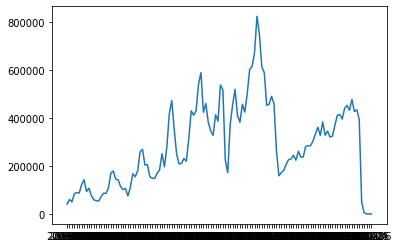

In [ ]:
# 중국 '관광' 그래프

plt.plot(df_filter['기준년월'],df_filter['관광'])

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


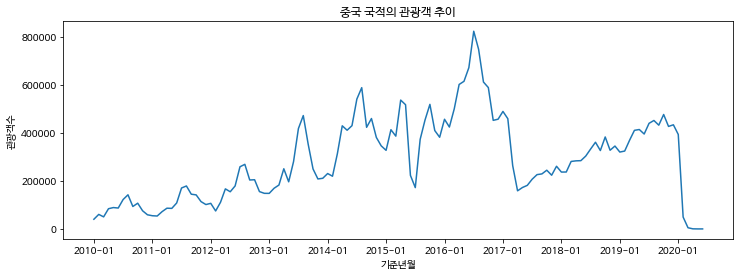

In [ ]:

#plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize = (12,4))

plt.plot(df_filter['기준년월'],df_filter['관광'])

plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')


plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

plt.show()

In [ ]:
# 그래프 해석 
1. 2010년에서 2016년까지는 방문객수가 꾸준히 증가하는 추세
2. 2017년 초에 큰폭으로 감소하다가 중순부터 완만하게 증가하는 추세
3. 매년 여름에 관광객의 수가 최대임을 볼수 있다. 
4. 2020년 초에 관광객수가 0에 가까워질만큼 큰폭으로 급격히 감소 

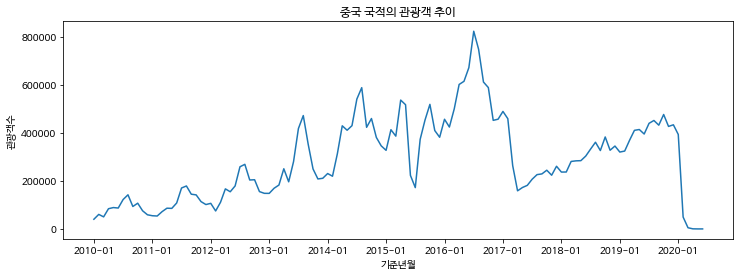

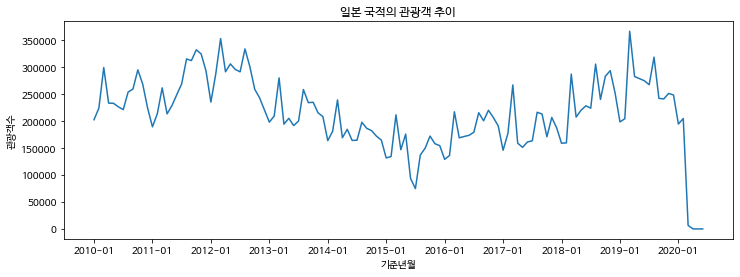

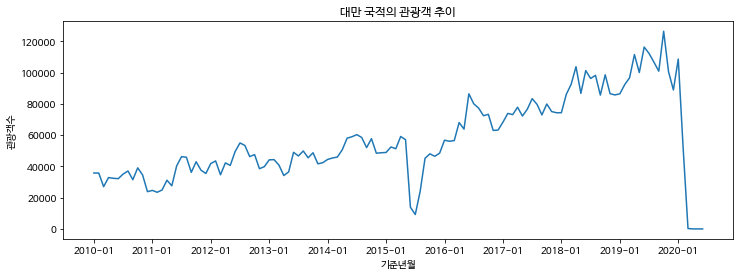

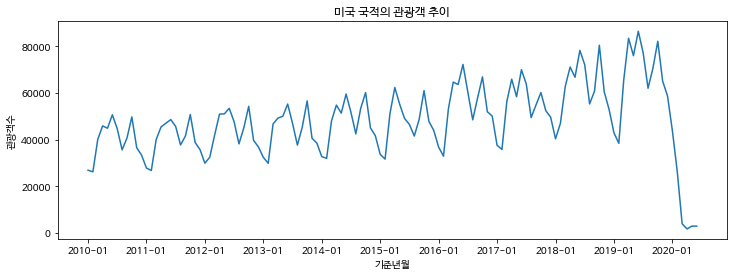

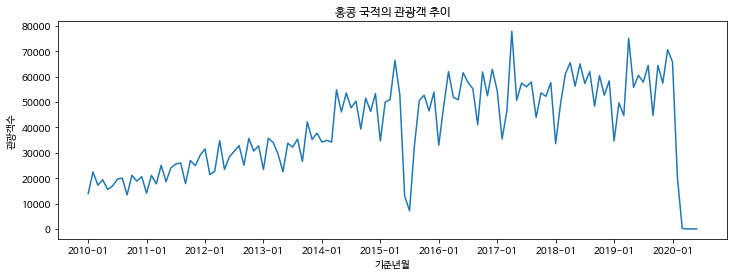

In [ ]:
# 반복문을 사용하여 중국,일본,대만,미국,홍콩    관광객 추이 그래프 작성 후 코드와 그림 제출  
countrylist = ['중국','일본','대만','미국','홍콩']
for country in countrylist:
  condition = (df['국적'] == country)
  df_filter = df[condition]

  plt.figure(figsize = (12,4))
  plt.plot(df_filter['기준년월'],df_filter['관광'])
  plt.title('{} 국적의 관광객 추이'.format(country))
  plt.xlabel('기준년월')
  plt.ylabel('관광객수')
  plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
  plt.show()



In [ ]:
#  년도와 월  중국 데이터로   히트맵 그래프 그리기 ,

condition = (df['국적'] == '중국')

df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)


df_filter = df[condition]

df_pivot = df_filter.pivot_table(values = '관광',
                                 index = '년도',
                                 columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


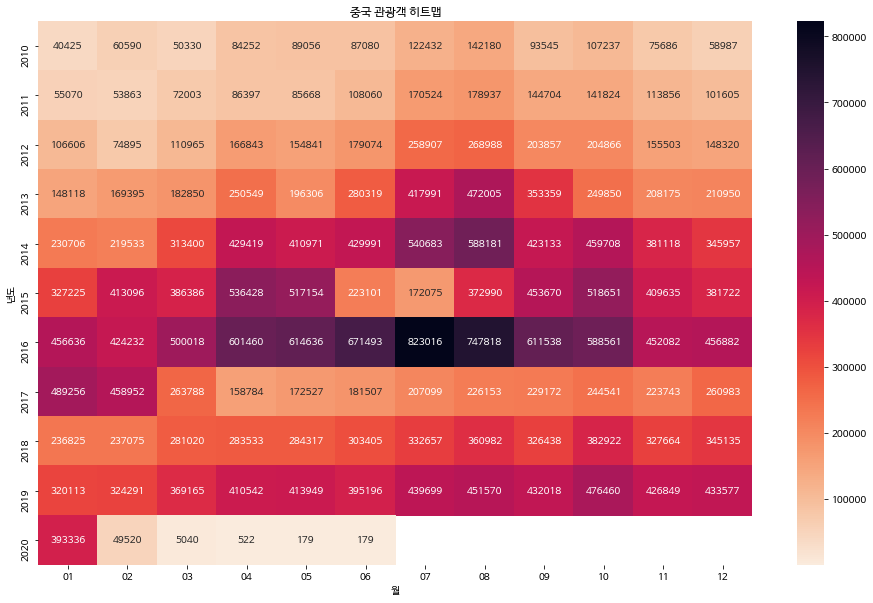

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))

sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

plt.title('중국 관광객 히트맵')

plt.show()

In [ ]:
그래프 해석 
1. 2017년 3월까지 색깔이 진해지는 것으로 보아 관광객수가 꾸준히 지속적으로 증가
2. 7월과 8월의 색깔이 전반적으로 진한것을 확인할 수 있다. 
3. 2015년 6월과 7월 관광객수가 특이하게 적음을 볼수 있다. 
4. 2020년 2월 부터 관광객의 수가 급격히 적어졌다. 

In [ ]:
# q4 반복문을 사용해서 5개국에 대한 히트맵을 그리기 
# countrylist = ['중국','일본','대만','미국','홍콩']
